# join , merge 

In [14]:
import pandas as pd 
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [21]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [22]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [25]:
#df1.join(df2)

In [17]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [18]:
df3 = pd.merge(df1, df2, on='employee') # on parameter عوامل 
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [9]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3=pd.merge(df1, df3, left_on="employee", right_on="name")
df3

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [20]:
#pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)
#df1.join(df2)

In [26]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [27]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [34]:
data=pd.concat([df1,df2],axis=0)
data

,employee,group,hire_date
0,Bob,Accounting,NaN
1,Jake,Engineering,NaN
2,Lisa,Engineering,NaN
3,Sue,HR,NaN
0,Lisa,NaN,2004.0
1,Bob,NaN,2008.0
2,Jake,NaN,2012.0
3,Sue,NaN,2014.0


In [35]:
data.shape

(8, 3)

In [36]:
data2=pd.concat([df1,df2],axis=1)
data2

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [37]:
data2.shape

(4, 4)

In [40]:
data3 = df2.append(df1)
data3

,employee,hire_date,group
0,Lisa,2004.0,NaN
1,Bob,2008.0,NaN
2,Jake,2012.0,NaN
3,Sue,2014.0,NaN
0,Bob,NaN,Accounting
1,Jake,NaN,Engineering
2,Lisa,NaN,Engineering
3,Sue,NaN,HR


In [41]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [42]:
df.groupby("key")

In [43]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [44]:
df.groupby("key").max()

,data
key,
A,3
B,4
C,5


In [45]:
df.groupby("key").min()

,data
key,
A,0
B,1
C,2


In [46]:
df.groupby("data")

In [47]:
df.groupby("data").sum()

,key
data,
0,A
1,B
2,C
3,A
4,B
5,C


In [93]:
import numpy as np
df.groupby('key').aggregate([min, np.median, 'max'])

data           
     min median max
key                
A      0    1.5   3
B      1    2.5   4
C      2    3.5   5

In [96]:
#df.groupby('key').aggregate({'data1': 'min',
                             #'data2': 'max'})

In [51]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [59]:
data= planets.groupby("year")['distance'].min()

In [62]:
data = pd.DataFrame(data)

In [73]:
data.dropna()

,distance
year,
1989,40.57
1995,15.36
1996,12.53
1997,17.43
1998,4.70
1999,10.91
2000,3.22
2001,14.08
2002,12.53


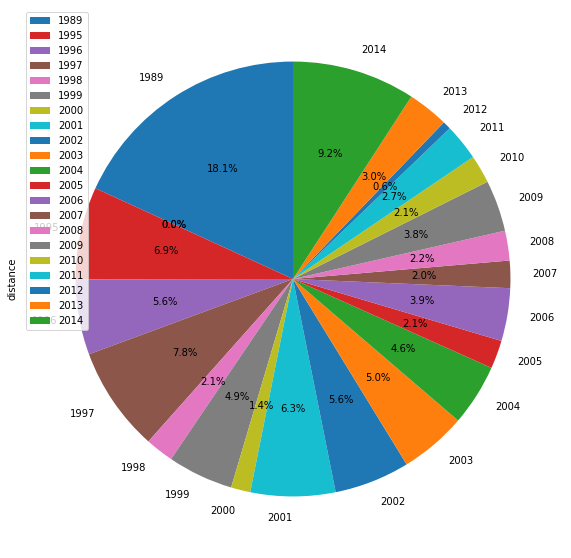

In [79]:
import seaborn as sns
#sns.relplot(x='distance',y='year',data=data)
import matplotlib.pyplot as plt
#create pie chart
data.plot(kind='pie',startangle=90,figsize=(15,10),subplots=True, autopct='%1.1f%%')
plt.show()

In [52]:
planets.groupby('method')

In [53]:
planets.groupby('method')['orbital_period']

In [55]:
planets.groupby('method')['orbital_period'].max()

method
Astrometry                         1016.000000
Eclipse Timing Variations         10220.000000
Imaging                          730000.000000
Microlensing                       5100.000000
Orbital Brightness Modulation         1.544929
Pulsar Timing                     36525.000000
Pulsation Timing Variations        1170.000000
Radial Velocity                   17337.500000
Transit                             331.600590
Transit Timing Variations           160.000000
Name: orbital_period, dtype: float64

In [56]:
planets.groupby('method')['year'].max()

method
Astrometry                       2013
Eclipse Timing Variations        2012
Imaging                          2013
Microlensing                     2013
Orbital Brightness Modulation    2013
Pulsar Timing                    2011
Pulsation Timing Variations      2007
Radial Velocity                  2014
Transit                          2014
Transit Timing Variations        2014
Name: year, dtype: int64

In [80]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [81]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [82]:
planets['distance'].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [97]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [98]:
df.groupby("key").aggregate([min, np.median, 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [103]:
df.groupby('key').aggregate({"data1":'min','data2':'min'})

,data1,data2
key,,
A,0,3
B,1,0
C,2,3
